In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

%config IPCompleter.greedy=True

pd.options.display.max_columns = None

In [3]:
con = sa.create_engine('sqlite:///DatosValencia/airbnbValencia.db')

df = pd.read_sql('df', con = con)

df.head()

,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito
0,0,48154,Precioso apartamento con wifi,219476,LA SAIDIA,MORVEDRE,39.48375,-0.37502,Entire home/apt,92.0,3,4,81,Second floor on a farm from the late 19th cent...,f,4,1.0,2.0,2.0,161,4.60,4.78,4.49,2479,LA SAIDIA
1,1,136378,Old City Charm with Modern Comfort,591197,CIUTAT VELLA,EL MERCAT,39.47358,-0.37815,Entire home/apt,75.0,28,2,0,None,f,3,1.0,1.0,2.0,25,4.46,4.80,4.84,3832,CIUTAT VELLA
2,2,149715,1900 Style Valencian Beach Home for 10px,5947,POBLATS MARITIMS,CABANYAL-CANYAMELAR,39.46746,-0.32813,Entire home/apt,269.0,2,1,260,Typical town house with 5 bedrooms and 3 and a...,f,10,4.0,5.0,7.0,259,4.66,4.89,4.59,2662,POBLATS MARITIMS
3,3,165971,★ Architectural touch! ★,791187,EXTRAMURS,LA ROQUETA,39.46790,-0.38206,Entire home/apt,132.0,5,7,16,"Hola! I am ready to welcome you in my apt., wh...",None,5,1.0,1.0,1.0,517,4.87,4.87,4.83,3125,EXTRAMURS
4,4,182221,Apartments Calatrava City Valencia,1315567,CAMINS AL GRAU,AIORA,39.46343,-0.34325,Entire home/apt,180.0,3,2,336,None,f,5,1.0,2.0,5.0,8,4.50,4.63,4.25,2896,CAMINS AL GRAU


In [4]:


df.distrito.value_counts()

distrito
POBLATS MARITIMS     1762
CIUTAT VELLA         1468
CAMINS AL GRAU        833
QUATRE CARRERES       744
L'EIXAMPLE            736
EXTRAMURS             664
LA SAIDIA             532
ALGIROS               410
L'OLIVERETA           281
JESUS                 278
PATRAIX               218
EL PLA DEL REAL       204
POBLATS DEL SUD       183
RASCANYA              182
BENICALAP             169
BENIMACLET            148
CAMPANAR              142
POBLATS DE L'OEST      37
POBLATS DEL NORD       11
Name: count, dtype: int64

In [5]:

df.loc[df.distrito == "POBLATS MARITIMS", :].groupby("room_type").price.mean()


room_type
Entire home/apt    159.701326
Private room        56.585890
Shared room         90.000000
Name: price, dtype: float64

In [6]:
# calculate total price per property

# we create an adjustment factor, ASSUMPTING that this is given to us by an expert


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9002 entries, 0 to 9001
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           9002 non-null   int64  
 1   id                              9002 non-null   int64  
 2   name                            9002 non-null   object 
 3   host_id                         9002 non-null   int64  
 4   neighbourhood_group             9002 non-null   object 
 5   neighbourhood                   9002 non-null   object 
 6   latitude                        9002 non-null   float64
 7   longitude                       9002 non-null   float64
 8   room_type                       9002 non-null   object 
 9   price                           9002 non-null   float64
 10  minimum_nights                  9002 non-null   int64  
 11  calculated_host_listings_count  9002 non-null   int64  
 12  availability_365                90

In [6]:
# we want to homogenize all the flats,
# a piece of information that would give us the capacity of the flat to generate money


def crear_precio_total(registro):
    if (registro.bedrooms > 1) & \
    ((registro.room_type == "Private room") | (registro.room_type == "Shared room")):
        #when it is a private or shared room, that is, it is not the entire apartment
        #and it has at least one bed, otherwise I assume not (?)
        #it would be more correct to say it with rooms instead of beds
        salida = registro.price * registro.bedrooms * 0.7
    else:
        salida = registro.price
    
    return salida

    
df["precio_total"] = df.apply(crear_precio_total, axis = 1) 


df["precio_total"]    
    

0        92.0
1        75.0
2       269.0
3       132.0
4       180.0
        ...  
8997     90.0
8998     39.0
8999     57.0
9000    400.0
9001     70.0
Name: precio_total, Length: 9002, dtype: float64

In [7]:

df.loc[
    (df["room_type"] != 'Entire home/apt') & (df["bedrooms"] != 1.0), 
    ['room_type', 'price', 'bedrooms', 'beds', 'precio_total']
].head()



,room_type,price,bedrooms,beds,precio_total
49,Private room,68.0,2.0,2.0,95.2
156,Private room,60.0,2.0,1.0,84.0
317,Private room,120.0,3.0,2.0,252.0
352,Private room,35.0,2.0,2.0,49.0
425,Private room,56.0,2.0,2.0,78.4


In [8]:
df.availability_365.head()


0     81
1      0
2    260
3     16
4    336
Name: availability_365, dtype: int64

In [9]:


df["ocupacion"] = ((365 - df.availability_365)/365 * 100).astype('int64')

df.ocupacion

0        77
1       100
2        28
3        95
4         7
       ... 
8997     75
8998     78
8999     86
9000     26
9001      0
Name: ocupacion, Length: 9002, dtype: int64

### 0 bedrooms 

In [10]:
#########

df.loc[df.bedrooms<1, ['bedrooms', "bathrooms", "beds", 'accommodates']].mean()


bedrooms        0.000000
bathrooms       1.138787
beds            1.617647
accommodates    2.755515
dtype: float64

In [11]:
# does it more or less coincide with when there is a bedroom?

df.loc[df.bedrooms==1, ['bedrooms', "bathrooms", "beds", 'accommodates']].mean()

# yes, it matches quite well

bedrooms        1.000000
bathrooms       1.148532
beds            1.229769
accommodates    2.409434
dtype: float64

Given what we have seen, **we can conclude that the minimum bedrooms are 1**. So we will proceed to change all the corresponding cases.

In [12]:
df.loc[df.bedrooms==0, "bedrooms"] = 1.0

df.loc[df.bedrooms==0]

,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion


### We discretize bedrooms again

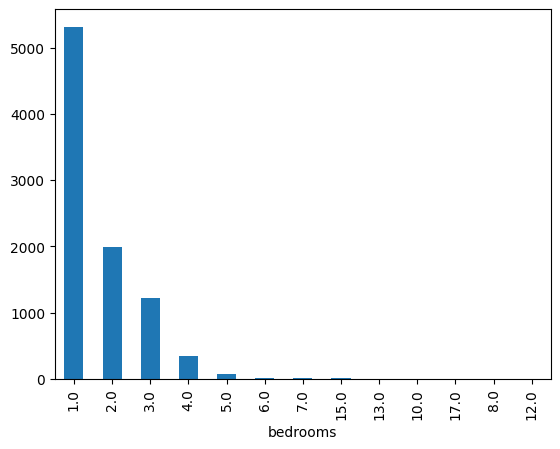

In [13]:
df.bedrooms.value_counts().plot.bar();

In [14]:
condiciones = [df.bedrooms == 0,
               df.bedrooms == 1,
               df.bedrooms == 2,
               df.bedrooms == 3, 
               df.bedrooms > 3
              ]

resultados = ["00_Cero","01_Uno", '02_Dos',"03_Tres", "04_Cuatro_o_mas"]


df["bedrooms_disc"]=np.select(condiciones, resultados, default = -999)

In [15]:
df.bedrooms_disc.head()

0             02_Dos
1             01_Uno
2    04_Cuatro_o_mas
3             01_Uno
4             02_Dos
Name: bedrooms_disc, dtype: object

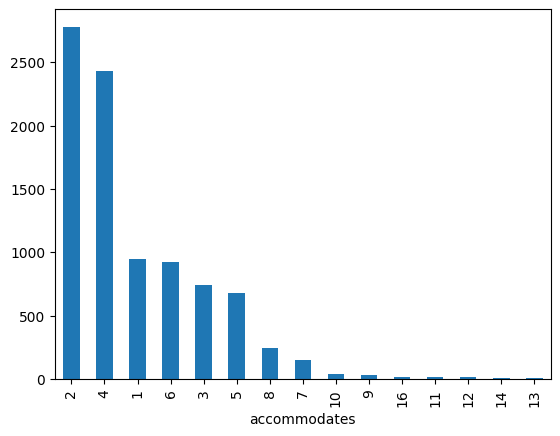

In [16]:
df.accommodates.value_counts().plot.bar();

In [17]:
df['accommodates_disc'] = pd.qcut(df.accommodates, [0.0,0.3,0.7,1.0], 
       labels = ['1-2', "3-4", "5-16"])

df.accommodates_disc.head()

0     3-4
1     3-4
2    5-16
3    5-16
4    5-16
Name: accommodates_disc, dtype: category
Categories (3, object): ['1-2' < '3-4' < '5-16']

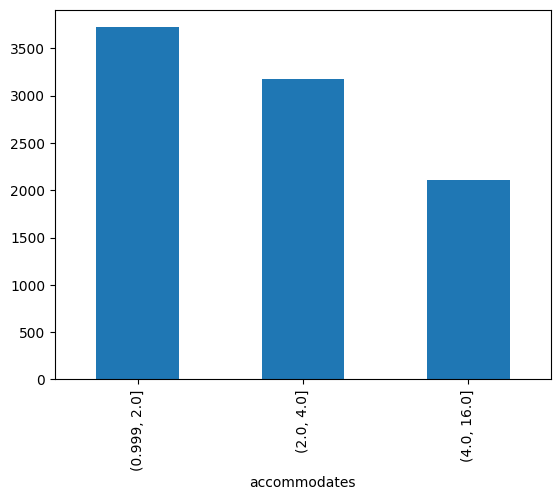

In [18]:
pd.qcut(df.accommodates, [0.0,0.3,0.7,1.0]).value_counts().plot.bar();

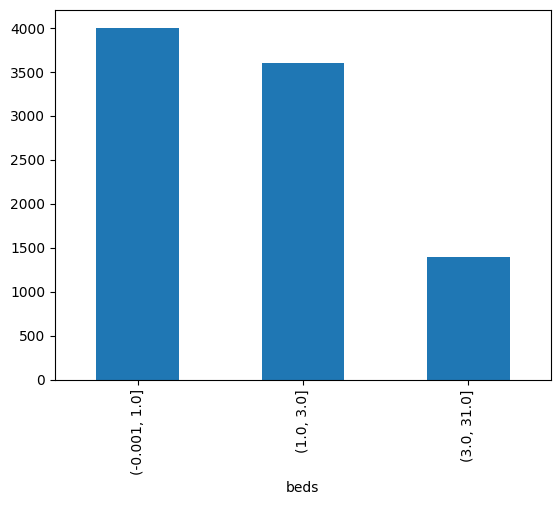

In [19]:
# now with beds

pd.qcut(df.beds, [0.0,0.2,0.7,1.0]).value_counts().plot.bar();


In [20]:
df['beds_disc'] = \
pd.qcut(df.beds, [0.0,0.2,0.7,1.0], 
       labels = ['0-1', "2-3", "4-31"])

df.beds_disc.head()

0     2-3
1     2-3
2    4-31
3     0-1
4    4-31
Name: beds_disc, dtype: category
Categories (3, object): ['0-1' < '2-3' < '4-31']

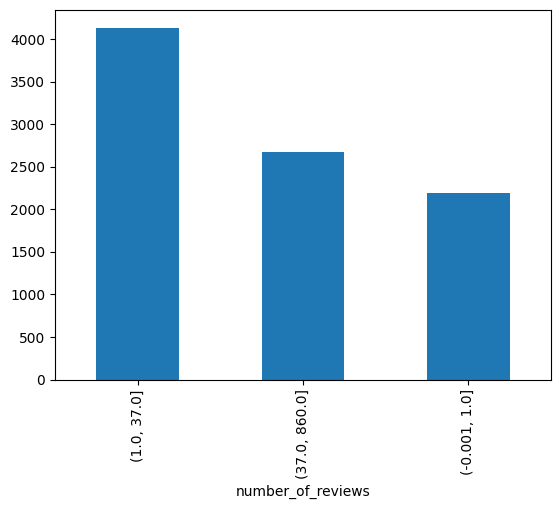

In [21]:
# reviews

pd.qcut(df.number_of_reviews, [0.0,0.2,0.7,1.0]).value_counts().plot.bar();


In [22]:
df['number_of_reviews_disc'] = \
pd.qcut(df.beds, [0.0,0.2,0.7,1.0], 
       labels = ['0-1', "2-37", "38-860"])

df.beds_disc.head()

0     2-3
1     2-3
2    4-31
3     0-1
4    4-31
Name: beds_disc, dtype: category
Categories (3, object): ['0-1' < '2-3' < '4-31']

### Vale, seguimos

In [23]:
# we are going to establish some m2 assigned to each floor,
# these are going to be assumptions with a lot of error

condiciones = [df.bedrooms ==1 , 
               df.bedrooms ==2, 
               df.bedrooms ==3,
               df.bedrooms ==4,
               df.bedrooms >4
              ]

resultados = [50,70,90,120,160]

df['m2'] = np.select(condiciones, resultados, default = -999)

df.m2.head()

0     70
1     50
2    160
3     50
4     70
Name: m2, dtype: int64

In [24]:
df.m2.value_counts()

m2
50     5314
70     1992
90     1227
120     347
160     122
Name: count, dtype: int64

In [25]:

df['precio_compra'] = df.m2 * df.precio_m2 * 0.7 
# we assume we can get it at a 70% discount from our negotiators


In [26]:
df[['bedrooms', "m2", 'distrito', 'precio_m2', 'precio_compra']].head(20)

,bedrooms,m2,distrito,precio_m2,precio_compra
0,2.0,70,LA SAIDIA,2479,121471.0
1,1.0,50,CIUTAT VELLA,3832,134120.0
2,5.0,160,POBLATS MARITIMS,2662,298144.0
3,1.0,50,EXTRAMURS,3125,109375.0
4,2.0,70,CAMINS AL GRAU,2896,141904.0
5,2.0,70,CIUTAT VELLA,3832,187768.0
6,1.0,50,POBLATS MARITIMS,2662,93170.0
7,1.0,50,POBLATS MARITIMS,2662,93170.0
8,2.0,70,CAMINS AL GRAU,2896,141904.0
9,2.0,70,POBLATS MARITIMS,2662,130438.0


In [2]:
# remember that this is just a rough indicator of how much it might cost to get it
# it reflects reality, but it doesn't have to coincide.

### Distance to points of interest

In [27]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 6372.8 

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

In [28]:
# well, I'm going to look for a point of interest in Valencia
# ciutat de les arts i les ciences, for example

#39°27′16″N 0°21′01″O

lat_arts = 39.4544444
lon_arts = -0.35027777


# pdi: puntos de interés
df['pdi_arts'] = df.apply(
    lambda registro: haversine(lat_arts,lon_arts,registro.latitude,registro.longitude),
    axis = 1)

df.groupby('distrito').pdi_arts.mean().sort_values()


distrito
CAMINS AL GRAU        1.271280
QUATRE CARRERES       1.495558
ALGIROS               2.128718
L'EIXAMPLE            2.150714
EL PLA DEL REAL       2.248763
POBLATS MARITIMS      2.352697
CIUTAT VELLA          3.264724
JESUS                 3.283503
EXTRAMURS             3.413589
BENIMACLET            3.587123
PATRAIX               3.959234
LA SAIDIA             4.077861
L'OLIVERETA           4.603434
RASCANYA              4.729975
CAMPANAR              4.980256
BENICALAP             5.595700
POBLATS DE L'OEST     7.592529
POBLATS DEL NORD      7.863311
POBLATS DEL SUD      13.250605
Name: pdi_arts, dtype: float64

In [29]:
df.to_sql('df_preparado', con = con, if_exists='replace')

9002